In [54]:
import re
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes, linear_model, ensemble, svm
from sklearn.metrics import classification_report,accuracy_score

LOADING THE DATASET

In [2]:
df = pd.read_csv('./finalSentimentdata2.csv')
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


DATA CLEANING

In [9]:
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'\[.*?\]', '', regex=True)
df['text'] = df['text'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)
df['text'] = df['text'].str.replace(r'<.*?>+', '', regex=True)
df['text'] = df['text'].str.replace(f"[{re.escape(string.punctuation)}]", '', regex=True)
df['text'] = df['text'].str.replace(r'\n', '', regex=True)
df['text'] = df['text'].str.replace(r'\w*\d\w*', '', regex=True)

In [11]:
df['text'] = df['text'].str.replace(
    "[" +
    u"\U0001F600-\U0001F64F"  # emoticonok
    u"\U0001F300-\U0001F5FF"  # szimbólumok és piktogramok
    u"\U0001F680-\U0001F6FF"  # térkép ikonok
    u"\U0001F1E0-\U0001F1FF"  # zászlók
    u"\U00002702-\U000027B0"  # különleges szimbólumok
    u"\U000024C2-\U0001F251"  # egyéb unicode karakterek
    "]+",
    '',
    regex=True
)

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


DATA SPLITTING

In [17]:
train, validation = train_test_split(
    df,
    test_size = 0.2,
    random_state = 0,
    stratify = df.sentiment.values
)

#stratifikáció: a train_test_split módszer olyan részhalmazokat ad vissza, amelyek az 
#osztálycímkék azonos arányát tartalmazzák, mint a bemeneti adathalmaz

TEXT VECTORIZATION

In [22]:
stopword = list(nltk.corpus.stopwords.words('english'))

vectorizer = CountVectorizer(
    decode_error = 'replace',
    stop_words = stopword
)

x_train = vectorizer.fit_transform(train.text.values)
x_validation = vectorizer.transform(validation.text.values)
y_train = train.sentiment.values
y_validation = validation.sentiment.values

NAIVE-BAYES

In [33]:
nb_classifier = naive_bayes.MultinomialNB()
nb_classifier.fit(x_train, y_train)
nb_predict = nb_classifier.predict(x_validation)
nb_acc = accuracy_score(y_validation, nb_predict)

print('train accuracy: ', nb_classifier.score(x_train, y_train))
print('validation accuracy: ', nb_acc)

train accuracy:  0.9526699029126213
validation accuracy:  0.6779935275080906


SCHOCHASTIC GRADIENT DESCENT

In [36]:
sgd_classifier = linear_model.SGDClassifier(
    loss = 'hinge',
    penalty = 'l2',
    random_state = 0
)
sgd_classifier.fit(x_train, y_train)
sgd_pred = sgd_classifier.predict(x_validation)
sgd_acc = accuracy_score(y_validation, sgd_pred)

print('train accuracy: ', sgd_classifier.score(x_train, y_train))
print('validation accuracy: ', sgd_acc)

train accuracy:  0.9991909385113269
validation accuracy:  0.6893203883495146


RANDOM FOREST

In [39]:
rf_classifier = ensemble.RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
rf_pred = rf_classifier.predict(x_validation)
rf_acc = accuracy_score(y_validation, rf_pred)

print('train accuracy: ', rf_classifier.score(x_train, y_train))
print('validation ccuracy: ', rf_acc)

train accuracy:  1.0
validation ccuracy:  0.6294498381877023


LOGISTIC REGRESSION

In [43]:
lr_classifier = linear_model.LogisticRegression()
lr_classifier.fit(x_train, y_train)
lr_pred = lr_classifier.predict(x_validation)
lr_acc = accuracy_score(y_validation, lr_pred)

print('train accuracy: ', lr_classifier.score(x_train, y_train))
print('validation accuracy: ', lr_acc)

train accuracy:  0.9955501618122977
validation accuracy:  0.6957928802588996


SUPPORT VECTOR MACHINE

In [49]:
svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)
svm_pred = svc_classifier.predict(x_validation)
svm_acc = accuracy_score(y_validation, svm_pred)

print('train accuracy: ', svm_classifier.score(x_train, y_train))
print('validation accuracy: ', svm_acc)

train accuracy:  0.9397249190938511
validation accuracy:  0.6197411003236246


COMPARISION

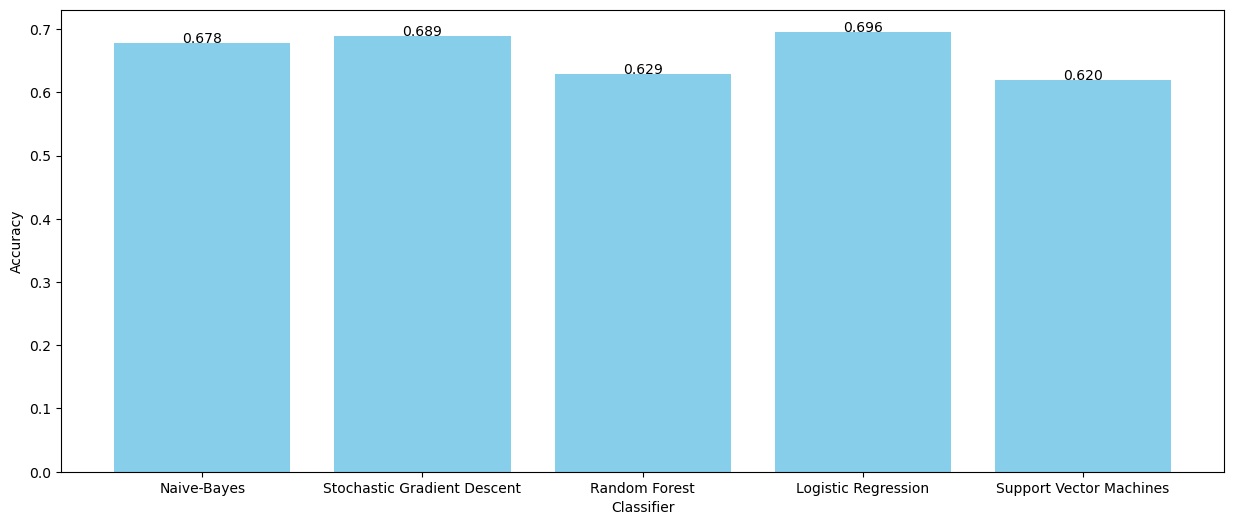

In [61]:
labels = ['Naive-Bayes', 'Stochastic Gradient Descent', 'Random Forest',
          'Logistic Regression', 'Support Vector Machines']

values = [nb_acc, sgd_acc, rf_acc, lr_acc, svm_acc]

plt.figure(figsize=(15, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

for i, j in enumerate(values):
    plt.text(i, j, f'{j:.3f}', ha='center')

plt.show()